## Baseline solution

In [1]:
!pip install cdt seaborn==0.12.0 tqdm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 921.1/921.1 KB 38.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 285.1/285.1 KB 20.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for GPUtil: filename=GPUtil-1.4.0-py3-none-any.whl size=7408 sha256=efd15182244f48e66132d8700d6e59fffd83eb44f1e35ec72fa1ce19a76b48a3
  Stored in directory: /root/.cache/pip/wheels/2b/b5/24/fbb56595c286984f7315ee31821d6121e1b9828436021a88b3
  Created wheel for skrebate: filename=skrebate-0.62-py3-none-any.whl size=29269 sha256=f3b1e3f1bcc4b80b9e020c930e8038b5a81e922cd3076aaa3507fea3e88f3497
  Stored in directory: /root/.cache/pip/wheels/f3/a1/a2/a4a90339e8fe767416385d9aabc02ab731fa14d55ce7694a33
Successfully built GPUtil skrebate
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from cdt.causality.pairwise import ANM, CDS
from tqdm.notebook import tqdm
tqdm.pandas()

Detecting 1 CUDA device(s).


In [3]:
!rm -rf starting_kit*

In [4]:
!wget -O starting_kit.zip https://www.codabench.org/datasets/download/aec2852c-b6ab-4652-90c0-bcf28f4a21dc/

--2023-04-10 13:46:36--  https://www.codabench.org/datasets/download/aec2852c-b6ab-4652-90c0-bcf28f4a21dc/
Resolving www.codabench.org (www.codabench.org)... 129.175.22.233
Connecting to www.codabench.org (www.codabench.org)|129.175.22.233|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://miniodis-rproxy.lisn.upsaclay.fr/coda-v2-prod-private/dataset/2023-03-07-1678213029/f98e0918f36d/starting_kit.zip?AWSAccessKeyId=EASNOMJFX9QFW4QIY4SL&Signature=rR27casmE1mAwPWdYODzDa5KQ4k%3D&Expires=1681220798 [following]
--2023-04-10 13:46:38--  https://miniodis-rproxy.lisn.upsaclay.fr/coda-v2-prod-private/dataset/2023-03-07-1678213029/f98e0918f36d/starting_kit.zip?AWSAccessKeyId=EASNOMJFX9QFW4QIY4SL&Signature=rR27casmE1mAwPWdYODzDa5KQ4k%3D&Expires=1681220798
Resolving miniodis-rproxy.lisn.upsaclay.fr (miniodis-rproxy.lisn.upsaclay.fr)... 129.175.8.8
Connecting to miniodis-rproxy.lisn.upsaclay.fr (miniodis-rproxy.lisn.upsaclay.fr)|129.175.8.8|:443... connected.
HT

In [5]:
!wget -O public_data.zip https://www.codabench.org/datasets/download/aafd38ea-cb96-47b6-be2e-e0fbacbb2bcb/

--2023-04-10 13:46:39--  https://www.codabench.org/datasets/download/aafd38ea-cb96-47b6-be2e-e0fbacbb2bcb/
Resolving www.codabench.org (www.codabench.org)... 129.175.22.233
Connecting to www.codabench.org (www.codabench.org)|129.175.22.233|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://miniodis-rproxy.lisn.upsaclay.fr/coda-v2-prod-private/dataset/2023-03-05-1678032644/7e70a7261e3c/public_data.zip?AWSAccessKeyId=EASNOMJFX9QFW4QIY4SL&Signature=E742S0ST1G10KoCBZvdfMghW85g%3D&Expires=1681220800 [following]
--2023-04-10 13:46:40--  https://miniodis-rproxy.lisn.upsaclay.fr/coda-v2-prod-private/dataset/2023-03-05-1678032644/7e70a7261e3c/public_data.zip?AWSAccessKeyId=EASNOMJFX9QFW4QIY4SL&Signature=E742S0ST1G10KoCBZvdfMghW85g%3D&Expires=1681220800
Resolving miniodis-rproxy.lisn.upsaclay.fr (miniodis-rproxy.lisn.upsaclay.fr)... 129.175.8.8
Connecting to miniodis-rproxy.lisn.upsaclay.fr (miniodis-rproxy.lisn.upsaclay.fr)|129.175.8.8|:443... connected.
HTTP

Here is a very simple and intuitive example of causal estimation. Here, the data is generated using a polynomial function, with a random noise added to it. The ANM is able to recover the causal direction of the relationship between X and Y.

In [6]:
!unzip public_data.zip

Archive:  public_data.zip
   creating: public_data/
   creating: public_data/train_set/
  inflating: public_data/train_set/X_train_info.csv  
  inflating: public_data/train_set/y_train.csv  
  inflating: public_data/train_set/X_train.csv  
  inflating: public_data/README.txt  
 extracting: public_data/test_set.zip  
   creating: public_data/valid_set/
  inflating: public_data/valid_set/X_valid_info.csv  
  inflating: public_data/valid_set/X_valid.csv  


In [7]:
data_path = 'public_data/train_set/X_train.csv'
target_path = 'public_data/train_set/y_train.csv'

In [8]:
# Load the validation data
X_train = pd.read_csv(data_path, index_col=0)
X_train

,A,B
SampleID,,
train1,-6348 4599 -9340 -13170 8456 -10079 -68 7957 ...,6 7 6 7 7 7 7 7 1 7 7 7 1 7 7 7 7 3 3 7 7 7 6...
train2,-6462 7666 19406 -2299 -22045 -6262 24734 -88...,3 4 5 5 5 4 3 7 4 5 5 4 1 5 4 4 5 4 5 5 5 5 5...
train3,12800 -6791 -539 -9092 9818 1646 13806 324 -6...,-7469 38799 -6292 2224 -11357 -10823 -8578 -5...
train4,14 580 -6627 10738 13938 -13793 -17467 -1269 ...,11883 -82 -3086 3150 -7775 -5290 1338 8765 52...
train5,1 1 0 0 1 0 1 1 1 0 1 0 1 0 0 0 1 1 1 1 1 1 1...,1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1...
...,...,...
train4046,4357 5081 8462 -2377 -12335 -9462 -8831 -1333...,-2732 -4691 8332 7864 6218 -7947 -8314 13878 ...
train4047,-2907 9751 14806 2 -17031 -399 11194 -10194 -...,1804 12086 -1686 10098 -8410 -7808 -6720 -289...
train4048,1 0 0 1 1 0 1 0 1 1 0 0 1 0 0 0 0 0 1 1 0 1 0...,0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0...


In [9]:
y_train = pd.read_csv(target_path, index_col=0)
y_train

,Target
SampleID,
train1,0
train2,1
train3,1
train4,1
train5,0
...,...
train4046,0
train4047,0
train4048,0


In [10]:
valid_data_path = 'public_data/valid_set/X_valid.csv'
X_valid = pd.read_csv(valid_data_path, index_col=0)
X_valid

,A,B
SampleID,,
valid1,19226 7619 -2173 5413 6894 3269 -19328 -15435...,187 3407 4666 -3868 7323 -4112 8857 -530 -809...
valid2,-10169 605 5991 -10169 -10169 11379 5991 -101...,-25205 5062 -5027 -5027 5062 -2505 2540 15151...
valid3,3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 4 3 3 2 2 4 3...,1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1...
valid4,0 0 1 1 1 1 1 0 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0...,0 0 1 1 1 1 1 1 0 0 1 0 1 1 0 0 1 0 0 0 1 0 1...
valid5,-9425 -9512 -8549 -6246 -3769 -1905 -8078 252...,1 10 7 1 11 14 14 10 10 9 11 1 14 10 1 8 2 14...
...,...,...
valid4046,1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1...,19353 -25221 16802 2789 7031 7061 -9638 -1200...
valid4047,-8711 -610 6343 4252 -3329 1036 4899 6145 596...,-3313 -3313 69 -3313 -13458 69 -10076 13595 -...
valid4048,-5516 15092 -5516 4788 -5516 -5516 -5516 -551...,15 21 21 21 21 3 8 21 21 21 2 22 21 18 9 14 2...


In [11]:
X_train.describe()

,A,B
count,4050,4050
unique,4050,4050
top,-6348 4599 -9340 -13170 8456 -10079 -68 7957 ...,6 7 6 7 7 7 7 7 1 7 7 7 1 7 7 7 7 3 3 7 7 7 6...
freq,1,1


The data is a list of pairs. Right now the data points are stored as strings, so we need to convert them to a list of numbers.

In [12]:
convert = lambda x: np.array([float(i) for i in x.split(' ')[1:]])
X_train["A"] = X_train["A"].apply(convert)
X_train["B"] = X_train["B"].apply(convert)
X_train

,A,B
SampleID,,
train1,"[-6348.0, 4599.0, -9340.0, -13170.0, 8456.0, -...","[6.0, 7.0, 6.0, 7.0, 7.0, 7.0, 7.0, 7.0, 1.0, ..."
train2,"[-6462.0, 7666.0, 19406.0, -2299.0, -22045.0, ...","[3.0, 4.0, 5.0, 5.0, 5.0, 4.0, 3.0, 7.0, 4.0, ..."
train3,"[12800.0, -6791.0, -539.0, -9092.0, 9818.0, 16...","[-7469.0, 38799.0, -6292.0, 2224.0, -11357.0, ..."
train4,"[14.0, 580.0, -6627.0, 10738.0, 13938.0, -1379...","[11883.0, -82.0, -3086.0, 3150.0, -7775.0, -52..."
train5,"[1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
...,...,...
train4046,"[4357.0, 5081.0, 8462.0, -2377.0, -12335.0, -9...","[-2732.0, -4691.0, 8332.0, 7864.0, 6218.0, -79..."
train4047,"[-2907.0, 9751.0, 14806.0, 2.0, -17031.0, -399...","[1804.0, 12086.0, -1686.0, 10098.0, -8410.0, -..."
train4048,"[1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ..."


Convert also valid set

In [13]:
convert = lambda x: np.array([float(i) for i in x.split(' ')[1:]])
X_valid["A"] = X_valid["A"].apply(convert)
X_valid["B"] = X_valid["B"].apply(convert)
X_valid

,A,B
SampleID,,
valid1,"[19226.0, 7619.0, -2173.0, 5413.0, 6894.0, 326...","[187.0, 3407.0, 4666.0, -3868.0, 7323.0, -4112..."
valid2,"[-10169.0, 605.0, 5991.0, -10169.0, -10169.0, ...","[-25205.0, 5062.0, -5027.0, -5027.0, 5062.0, -..."
valid3,"[3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, ...","[1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, ..."
valid4,"[0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, ...","[0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, ..."
valid5,"[-9425.0, -9512.0, -8549.0, -6246.0, -3769.0, ...","[1.0, 10.0, 7.0, 1.0, 11.0, 14.0, 14.0, 10.0, ..."
...,...,...
valid4046,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[19353.0, -25221.0, 16802.0, 2789.0, 7031.0, 7..."
valid4047,"[-8711.0, -610.0, 6343.0, 4252.0, -3329.0, 103...","[-3313.0, -3313.0, 69.0, -3313.0, -13458.0, 69..."
valid4048,"[-5516.0, 15092.0, -5516.0, 4788.0, -5516.0, -...","[15.0, 21.0, 21.0, 21.0, 21.0, 3.0, 8.0, 21.0,..."


### Down sampling

Some of these pairs have a massive ammount of points.

We are going to downsample those have have more than 600 points, down to 600 points. We might lose information, but it will make the computation of the ANM faster. Computing the ANM without downsampling on the **full** validation set would take hours, but with downsampling it took about 15 minutes on Google Colab.

In [14]:
X_train_downsampled = X_train.copy()

In [15]:
def downsample_row(row):
  if len(row.A) > 600:
    indices = np.random.choice(len(row.A), size=600, replace=False)
    rowcopy = row.copy()
    rowcopy.A = rowcopy.A[indices]
    rowcopy.B = rowcopy.B[indices]
    
    return rowcopy
  return row

In [16]:
X_train_downsampled = X_train_downsampled.progress_apply(downsample_row, axis=1)

  0%|          | 0/4050 [00:00<?, ?it/s]

In [17]:
X_train_downsampled.A.apply(len).describe()

count    4050.000000
mean      580.573086
std        66.307539
min        53.000000
25%       600.000000
50%       600.000000
75%       600.000000
max       600.000000
Name: A, dtype: float64

In [18]:
X_valid_downsampled = X_valid.copy()
X_valid_downsampled = X_valid_downsampled.progress_apply(downsample_row, axis=1)
X_valid_downsampled.A.apply(len).describe()

  0%|          | 0/4050 [00:00<?, ?it/s]

count    4050.000000
mean      579.717531
std        69.758655
min        53.000000
25%       600.000000
50%       600.000000
75%       600.000000
max       600.000000
Name: A, dtype: float64

#### Visualization of down sampled data

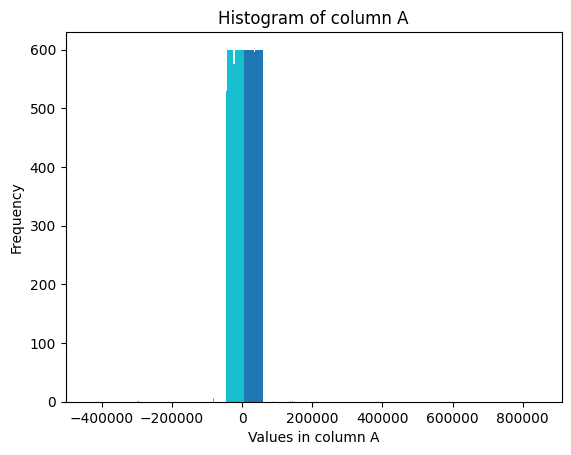

In [19]:
# plot a histogram of column A
plt.hist(X_train_downsampled['A'])
plt.xlabel('Values in column A')
plt.ylabel('Frequency')
plt.title('Histogram of column A')
plt.show()

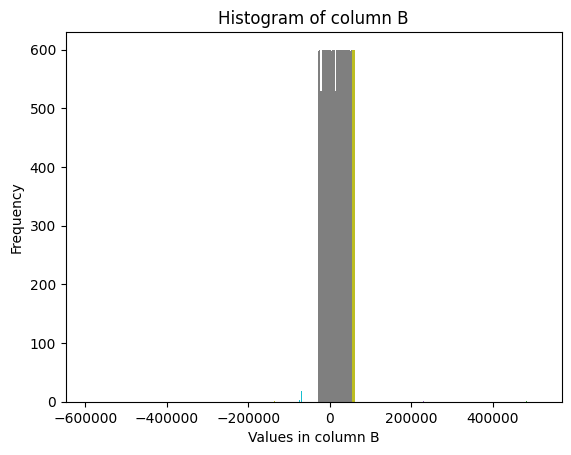

In [20]:
# plot a histogram of column B
plt.hist(X_train_downsampled['B'])
plt.xlabel('Values in column B')
plt.ylabel('Frequency')
plt.title('Histogram of column B')
plt.show()

0.4833261263322468


(array([  16.,   58.,  230.,  510., 2356.,  579.,  213.,   69.,   16.,
           3.]),
 array([-1121.00833333,  -873.995     ,  -626.98166667,  -379.96833333,
         -132.955     ,   114.05833333,   361.07166667,   608.085     ,
          855.09833333,  1102.11166667,  1349.125     ]),
 <BarContainer object of 10 artists>)

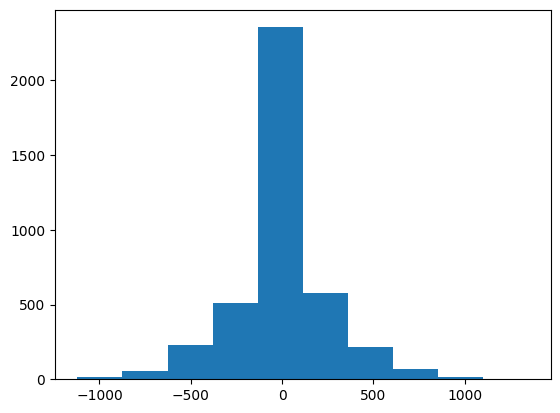

In [21]:
print(X_train_downsampled['A'].apply(np.mean).mean())
plt.hist(X_train_downsampled['A'].apply(np.mean))

4.815564181463346


(array([   4.,   26.,  101.,  256.,  667., 2264.,  472.,  197.,   54.,
           9.]),
 array([-1231.56833333,  -996.91033333,  -762.25233333,  -527.59433333,
         -292.93633333,   -58.27833333,   176.37966667,   411.03766667,
          645.69566667,   880.35366667,  1115.01166667]),
 <BarContainer object of 10 artists>)

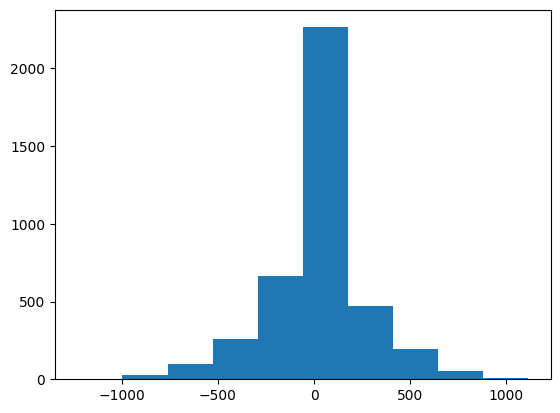

In [22]:
print(X_train_downsampled['B'].apply(np.mean).mean())
plt.hist(X_train_downsampled['B'].apply(np.mean))

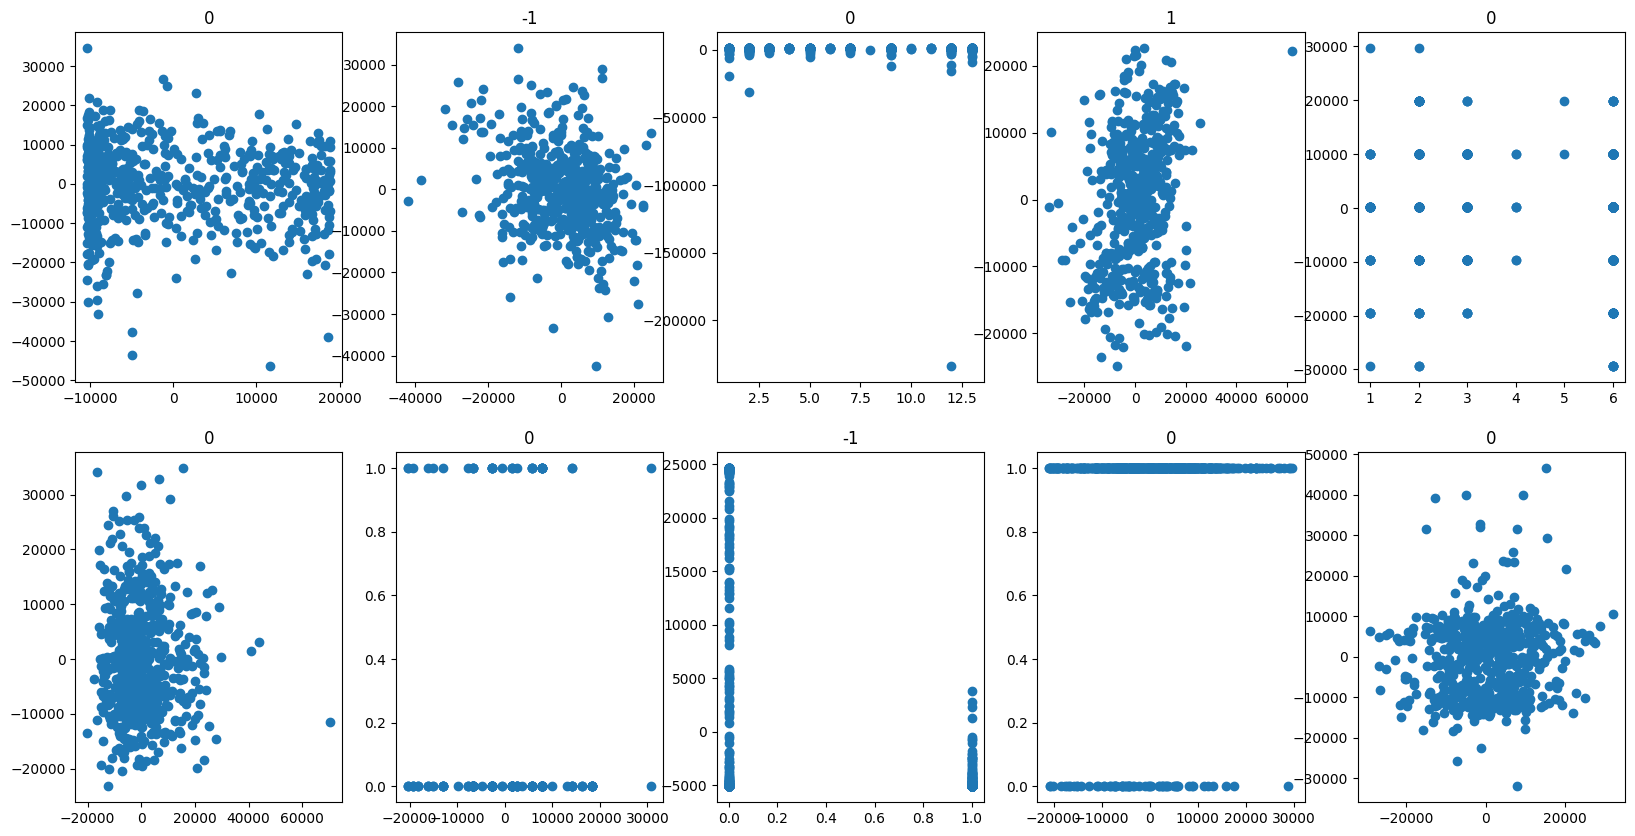

In [23]:
fig, axs = plt.subplots(2, 5, figsize=(20, 10))
for i in range(10):
    axs[i // 5, i % 5].scatter(X_train_downsampled["A"][i+10], X_train_downsampled["B"][i+10])
    axs[i // 5, i % 5].set_title(y_train['Target'][i+10])
plt.show()

Let's compute the ANM on the downsampled set.

In [24]:
anm = ANM()

In [25]:
def score_pair(row):
    a_to_b = anm.anm_score(row["A"].reshape(-1, 1), row["B"])
    b_to_a = anm.anm_score(row["B"].reshape(-1, 1), row["A"])
    return b_to_a - a_to_b

In [26]:
# apply score_pair to each row of the dataframe
res = X_train_downsampled.progress_apply(score_pair, axis=1)

  0%|          | 0/4050 [00:00<?, ?it/s]

Mean of empty slice.
invalid value encountered in double_scalars
Mean of empty slice.
invalid value encountered in double_scalars
Mean of empty slice.
invalid value encountered in double_scalars
invalid value encountered in true_divide
Mean of empty slice.
invalid value encountered in double_scalars
invalid value encountered in true_divide
Mean of empty slice.
invalid value encountered in double_scalars
overflow encountered in exp
invalid value encountered in reduce
Mean of empty slice.
invalid value encountered in double_scalars
overflow encountered in exp
invalid value encountered in reduce
overflow encountered in exp
invalid value encountered in reduce
Mean of empty slice.
invalid value encountered in double_scalars
Mean of empty slice.
invalid value encountered in double_scalars
invalid value encountered in true_divide
Mean of empty slice.
invalid value encountered in double_scalars
invalid value encountered in true_divide
Mean of empty slice.
invalid value encountered in double_sc

In [27]:
res

SampleID
train1       -0.132172
train2        0.129160
train3        2.086457
train4       -0.012986
train5      -16.196461
               ...    
train4046    -0.030846
train4047    -0.090747
train4048    -0.011785
train4049    -0.041103
train4050     0.753458
Length: 4050, dtype: float64

In [28]:
(res.values>0).sum()

2020

In [29]:
(res.values<0).sum()

2025

In [30]:
(res.values==0).sum() # samples with no additive noise

5

### Create new features

- Pearson correlation coefficient: measures the linear relationship between two variables.
- Mean of the two lists: can provide information on the central tendency of each list.
- Standard deviation of the two lists: can provide information on the variability of each list.
- Skewness and kurtosis of the two lists: can provide information on the shape of the distributions of each list.
- Granger causality: measures the causal relationship between two time series variables by examining whether past values of one variable help predict the future values of the other variable


In [31]:
df = pd.DataFrame(data=res, columns =['ANM']).rename_axis('SampleID')
df

,ANM
SampleID,
train1,-0.132172
train2,0.129160
train3,2.086457
train4,-0.012986
train5,-16.196461
...,...
train4046,-0.030846
train4047,-0.090747
train4048,-0.011785


In [32]:
df['Mean_A'] = X_train_downsampled['A'].apply(np.mean)
df['Mean_B'] = X_train_downsampled['B'].apply(np.mean)
df.head(2)

,ANM,Mean_A,Mean_B
SampleID,,,
train1,-0.132172,-0.005199,5.499133
train2,0.129160,369.290000,4.111667


In [33]:
from scipy.stats import pearsonr, skew, kurtosis

In [34]:
def pearson_corr(x):
    return pearsonr(x['A'], x['B'])[0]

df['correlation'] = X_train_downsampled.apply(pearson_corr, axis=1)
df.head(2)

An input array is constant; the correlation coefficient is not defined.


,ANM,Mean_A,Mean_B,correlation
SampleID,,,,
train1,-0.132172,-0.005199,5.499133,0.014696
train2,0.129160,369.290000,4.111667,-0.201693


In [35]:
df['Std_A'] = X_train_downsampled['A'].apply(np.std)
df['Std_B'] = X_train_downsampled['B'].apply(np.std)
df.head(2)

,ANM,Mean_A,Mean_B,correlation,Std_A,Std_B
SampleID,,,,,,
train1,-0.132172,-0.005199,5.499133,0.014696,9991.334990,2.291666
train2,0.129160,369.290000,4.111667,-0.201693,10556.391321,1.531621


In [36]:
df['skewness_A'] = X_train_downsampled['A'].apply(skew)
df['skewness_B'] = X_train_downsampled['B'].apply(skew)

df['kurtosis_A'] = X_train_downsampled['A'].apply(kurtosis)
df['kurtosis_B'] = X_train_downsampled['B'].apply(kurtosis)

df.head(2)

Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.


,ANM,Mean_A,Mean_B,correlation,Std_A,Std_B,skewness_A,skewness_B,kurtosis_A,kurtosis_B
SampleID,,,,,,,,,,
train1,-0.132172,-0.005199,5.499133,0.014696,9991.334990,2.291666,0.112447,-1.111304,-0.524831,-0.484470
train2,0.129160,369.290000,4.111667,-0.201693,10556.391321,1.531621,0.610602,-0.936714,2.150553,0.297421


In [37]:
df.fillna(0, inplace=True)
df.isna().sum()

ANM            0
Mean_A         0
Mean_B         0
correlation    0
Std_A          0
Std_B          0
skewness_A     0
skewness_B     0
kurtosis_A     0
kurtosis_B     0
dtype: int64

#### Preparing the valid set

In [38]:
# import statsmodels.api as sm

# # create two sample time series
# ts1 = X_train_downsampled['A'].iloc[4048]
# ts2 = X_train_downsampled['B'].iloc[4048]

# # create a 2D array from the time series
# data = np.column_stack((ts1, ts2))

# # compute the Granger causality
# result = sm.tsa.stattools.grangercausalitytests(data, maxlag=2)

# # print the results
# for lag in range(1, 3):
#     print(f"Granger causality at lag {lag}: p-value = {result[lag][0]['ssr_ftest'][1]}")

In [39]:
res_valid = X_valid_downsampled.progress_apply(score_pair, axis=1)
df_valid = pd.DataFrame(data=res_valid, columns =['ANM']).rename_axis('SampleID')

df_valid['Mean_A'] = X_valid_downsampled['A'].apply(np.mean)
df_valid['Mean_B'] = X_valid_downsampled['B'].apply(np.mean)

df_valid['Std_A'] = X_valid_downsampled['A'].apply(np.std)
df_valid['Std_B'] = X_valid_downsampled['B'].apply(np.std)

df_valid['correlation'] = X_valid_downsampled.apply(pearson_corr, axis=1)

df_valid['skewness_A'] = X_valid_downsampled['A'].apply(skew)
df_valid['skewness_B'] = X_valid_downsampled['B'].apply(skew)

df_valid['kurtosis_A'] = X_valid_downsampled['A'].apply(kurtosis)
df_valid['kurtosis_B'] = X_valid_downsampled['B'].apply(kurtosis)

df_valid


  0%|          | 0/4050 [00:00<?, ?it/s]

overflow encountered in exp
invalid value encountered in reduce
Mean of empty slice.
invalid value encountered in double_scalars
invalid value encountered in true_divide
Mean of empty slice.
invalid value encountered in double_scalars
overflow encountered in exp
invalid value encountered in reduce
overflow encountered in exp
invalid value encountered in reduce
overflow encountered in exp
invalid value encountered in reduce
Mean of empty slice.
invalid value encountered in double_scalars
invalid value encountered in true_divide
Mean of empty slice.
invalid value encountered in double_scalars
Mean of empty slice.
invalid value encountered in double_scalars
Mean of empty slice.
invalid value encountered in double_scalars
invalid value encountered in true_divide
Mean of empty slice.
invalid value encountered in double_scalars
Mean of empty slice.
invalid value encountered in double_scalars
invalid value encountered in true_divide
Mean of empty slice.
invalid value encountered in double_sca

,ANM,Mean_A,Mean_B,Std_A,Std_B,correlation,skewness_A,skewness_B,kurtosis_A,kurtosis_B
SampleID,,,,,,,,,,
valid1,0.263518,-0.018868,-0.013208,9990.556543,9990.563677,0.249900,-0.399642,-0.869263,-0.376759,3.349413
valid2,0.220465,-275.028333,-306.065000,9918.316289,10519.767221,-0.148140,0.844710,-0.476197,0.363946,-0.291116
valid3,0.025893,2.975000,0.655000,0.666615,0.475368,0.035896,-0.444444,-0.652126,0.596347,-1.574732
valid4,0.000185,0.525316,0.500000,0.499359,0.500000,0.063372,-0.101396,0.000000,-1.989719,-2.000000
valid5,-0.393301,-253.376667,7.671667,9887.303627,4.188142,0.152614,1.084098,-0.456228,0.094524,-1.008276
...,...,...,...,...,...,...,...,...,...,...
valid4046,0.168077,0.970000,-96.493333,0.170587,10093.283742,-0.022385,-5.510378,0.028897,28.364261,0.540888
valid4047,-0.330401,283.630000,-72.341667,9291.807803,9901.281546,0.077393,-2.920528,0.350540,13.389397,0.365500
valid4048,0.283884,-37.753333,17.155000,9949.093030,6.376335,0.025595,2.904004,-1.280419,11.304405,0.176447


In [40]:
df_valid.isna().sum()

ANM            0
Mean_A         0
Mean_B         0
Std_A          0
Std_B          0
correlation    4
skewness_A     2
skewness_B     2
kurtosis_A     2
kurtosis_B     2
dtype: int64

In [41]:
df_valid.fillna(0, inplace=True)
df_valid.isna().sum()

ANM            0
Mean_A         0
Mean_B         0
Std_A          0
Std_B          0
correlation    0
skewness_A     0
skewness_B     0
kurtosis_A     0
kurtosis_B     0
dtype: int64

In [42]:
df.columns

Index(['ANM', 'Mean_A', 'Mean_B', 'correlation', 'Std_A', 'Std_B',
       'skewness_A', 'skewness_B', 'kurtosis_A', 'kurtosis_B'],
      dtype='object')

In [43]:
df_valid = df_valid[['ANM', 'Mean_A', 'Mean_B', 'correlation', 'Std_A', 'Std_B',
       'skewness_A', 'skewness_B', 'kurtosis_A', 'kurtosis_B']]

In [44]:
df_valid

,ANM,Mean_A,Mean_B,correlation,Std_A,Std_B,skewness_A,skewness_B,kurtosis_A,kurtosis_B
SampleID,,,,,,,,,,
valid1,0.263518,-0.018868,-0.013208,0.249900,9990.556543,9990.563677,-0.399642,-0.869263,-0.376759,3.349413
valid2,0.220465,-275.028333,-306.065000,-0.148140,9918.316289,10519.767221,0.844710,-0.476197,0.363946,-0.291116
valid3,0.025893,2.975000,0.655000,0.035896,0.666615,0.475368,-0.444444,-0.652126,0.596347,-1.574732
valid4,0.000185,0.525316,0.500000,0.063372,0.499359,0.500000,-0.101396,0.000000,-1.989719,-2.000000
valid5,-0.393301,-253.376667,7.671667,0.152614,9887.303627,4.188142,1.084098,-0.456228,0.094524,-1.008276
...,...,...,...,...,...,...,...,...,...,...
valid4046,0.168077,0.970000,-96.493333,-0.022385,0.170587,10093.283742,-5.510378,0.028897,28.364261,0.540888
valid4047,-0.330401,283.630000,-72.341667,0.077393,9291.807803,9901.281546,-2.920528,0.350540,13.389397,0.365500
valid4048,0.283884,-37.753333,17.155000,0.025595,9949.093030,6.376335,2.904004,-1.280419,11.304405,0.176447


In [45]:
from sklearn.preprocessing import StandardScaler
scale= StandardScaler()
df = scale.fit_transform(df) 
df_valid = scale.transform(df_valid)

### Building the model

In [46]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(df, y_train)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


LogisticRegression(multi_class='multinomial')

In [50]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(df, y_train)

DecisionTreeClassifier()

### Saving the predictions

In [47]:
predictions = model.predict(df_valid)

In [51]:
predictions = dt.predict(df_valid)

In [52]:
results = pd.DataFrame(data=X_valid.index,columns = ['SampleID'])
results['Target'] = predictions
results

,SampleID,Target
0,valid1,-1
1,valid2,0
2,valid3,0
3,valid4,0
4,valid5,1
...,...,...
4045,valid4046,0
4046,valid4047,0
4047,valid4048,-1
4048,valid4049,-1


In [53]:
from pathlib import Path
from datetime import datetime

DATA = Path("public_data")
assert DATA.is_dir()

PRED_PATH = Path("Submissions")

PRED_PATH.mkdir(parents=True, exist_ok=True)

t_stamp = datetime.now().strftime("%Y-%m-%dT%H-%M-%S")
submission_fp = PRED_PATH / f"submission_{t_stamp}.zip"

pred_fname = "results.csv"
compr_opts = dict(method="zip", archive_name=pred_fname)

results.to_csv(submission_fp, compression=compr_opts, index=False, header=['SampleID', 'Target'])

print(f"The submission is ready: {submission_fp}")

The submission is ready: Submissions/submission_2023-04-10T14-57-54.zip
